## IMDB Datasets

In [1]:
import numpy as np
from tensorflow import keras
from keras import models 
from keras import layers
import matplotlib.pyplot as plt

from keras.datasets import imdb
# https://www.imdb.com/
(X, y_train), (X_test, y_test) = imdb.load_data(num_words=10000)

Using TensorFlow backend.


17465344/17464789 [==============================] - 24s 1us/step


C:\Users\LG\anaconda3\envs\seongmin_test\lib\site-packages\keras\datasets\imdb.py:101: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
C:\Users\LG\anaconda3\envs\seongmin_test\lib\site-packages\keras\datasets\imdb.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


In [2]:
# text to vector
def vect(seq, dim=10000):
    x=np.zeros((len(seq),dim))
    for n, i in enumerate(seq):
        x[n, i] = 1
    return x

X_train=vect(X)
X_test=vect(X_test)

In [3]:
X_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [4]:
net = models.Sequential()
net.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
net.add(layers.Dropout(0.5))
net.add(layers.Dense(16, activation='relu'))
net.add(layers.Dropout(0.5))
net.add(layers.Dense(1, activation='sigmoid'))
net.compile(optimizer='nadam', loss='binary_crossentropy', metrics = ['acc'])

X_val = X_train[:10000]
partial_X_train = X_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

val = net.fit(partial_X_train, partial_y_train, epochs=5, batch_size=128, validation_data=(X_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/5
15000/15000 [==============================] - 16s 1ms/step - loss: 0.5294 - acc: 0.7251 - val_loss: 0.3244 - val_acc: 0.8785
Epoch 2/5
15000/15000 [==============================] - 8s 543us/step - loss: 0.3321 - acc: 0.8773 - val_loss: 0.2813 - val_acc: 0.8846
Epoch 3/5
15000/15000 [==============================] - 6s 371us/step - loss: 0.2717 - acc: 0.9053 - val_loss: 0.2825 - val_acc: 0.8859
Epoch 4/5
15000/15000 [==============================] - 5s 322us/step - loss: 0.2310 - acc: 0.9186 - val_loss: 0.3301 - val_acc: 0.8771
Epoch 5/5
15000/15000 [==============================] - 5s 319us/step - loss: 0.1981 - acc: 0.9312 - val_loss: 0.3127 - val_acc: 0.8857


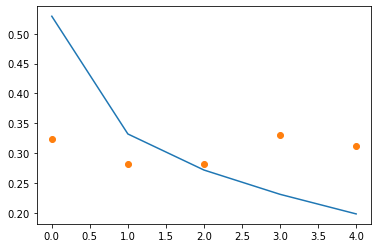

In [5]:
val_dict = val.history
loss = val_dict['loss']
val_loss = val_dict['val_loss']
x = np.arange(0,len(loss))

plt.plot(x,loss,'-')
plt.plot(x,val_loss,'o')

In [6]:
test_loss, test_acc = net.evaluate(X_test,y_test)

25000/25000 [==============================] - 18s 726us/step


In [7]:
test_loss, test_acc

(0.3361052378416061, 0.8745200037956238)

## IMDB Classification using simple RNN

In [8]:
from keras.preprocessing import sequence

max_words=10000 
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=max_words)

maxlen = 100 # sequence length
X_train = sequence.pad_sequences(X_train, maxlen=maxlen)
X_test = sequence.pad_sequences(X_test, maxlen=maxlen)

C:\Users\LG\anaconda3\envs\seongmin_test\lib\site-packages\keras\datasets\imdb.py:101: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
C:\Users\LG\anaconda3\envs\seongmin_test\lib\site-packages\keras\datasets\imdb.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


In [9]:
X_train[0]

array([1415,   33,    6,   22,   12,  215,   28,   77,   52,    5,   14,
        407,   16,   82,    2,    8,    4,  107,  117, 5952,   15,  256,
          4,    2,    7, 3766,    5,  723,   36,   71,   43,  530,  476,
         26,  400,  317,   46,    7,    4,    2, 1029,   13,  104,   88,
          4,  381,   15,  297,   98,   32, 2071,   56,   26,  141,    6,
        194, 7486,   18,    4,  226,   22,   21,  134,  476,   26,  480,
          5,  144,   30, 5535,   18,   51,   36,   28,  224,   92,   25,
        104,    4,  226,   65,   16,   38, 1334,   88,   12,   16,  283,
          5,   16, 4472,  113,  103,   32,   15,   16, 5345,   19,  178,
         32])

In [23]:
rnn = models.Sequential()
rnn.add(layers.Embedding(max_words, 16)) # 각각의 단어를 n=16 차원 공간에 올리기
rnn.add(layers.SimpleRNN(32,return_sequences='True')) 
rnn.add(layers.Dropout(0.7))
rnn.add(layers.SimpleRNN(16))
rnn.add(layers.Dropout(0.7))
rnn.add(layers.Dense(1, activation='sigmoid'))
rnn.compile(optimizer='nadam', loss='binary_crossentropy', metrics=['acc'])
# 다층 RNN를 하기 위해 return_sequences = True로 설정

In [24]:
history=rnn.fit(X_train, y_train, epochs=5, validation_split=0.2)

C:\Users\LG\anaconda3\envs\seongmin_test\lib\site-packages\tensorflow_core\python\framework\indexed_slices.py:433: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 20000 samples, validate on 5000 samples
Epoch 1/5
20000/20000 [==============================] - 59s 3ms/step - loss: 0.6896 - acc: 0.5637 - val_loss: 0.5905 - val_acc: 0.6794
Epoch 2/5
20000/20000 [==============================] - 60s 3ms/step - loss: 0.5784 - acc: 0.7050 - val_loss: 0.6622 - val_acc: 0.5672
Epoch 3/5
20000/20000 [==============================] - 68s 3ms/step - loss: 0.5442 - acc: 0.7467 - val_loss: 0.4917 - val_acc: 0.7834
Epoch 4/5
20000/20000 [==============================] - 59s 3ms/step - loss: 0.4689 - acc: 0.8056 - val_loss: 0.5001 - val_acc: 0.7844
Epoch 5/5
20000/20000 [==============================] - 62s 3ms/step - loss: 0.4413 - acc: 0.8241 - val_loss: 0.4991 - val_acc: 0.7722


In [25]:
val_dict = history.history
loss = val_dict['loss']
val_loss = val_dict['val_loss']

Text(0.5, 1.0, 'loss by epoches')

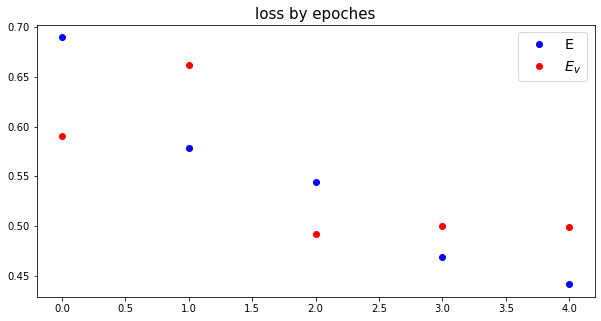

In [26]:
x = np.arange(0,len(loss))
plt.figure(figsize=(10,5))
plt.plot(x,loss,'bo',label='E')
plt.plot(x,val_loss,'ro',label='$E_v$')
plt.legend(fontsize='x-large')
plt.title("loss by epoches", fontsize='15')

Text(0.5, 1.0, 'accruary by epoches')

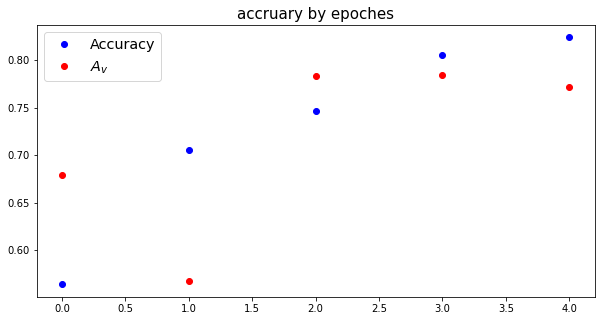

In [27]:
plt.figure(figsize=(10,5))
acc = val_dict['acc']
val_acc = val_dict['val_acc']
plt.plot(x,acc,'bo', label='Accuracy')
plt.plot(x,val_acc,'ro', label='$A_v$')
plt.legend(fontsize='x-large')
plt.title("accruary by epoches", fontsize=15)

In [28]:
test_loss, test_acc = rnn.evaluate(X_test,y_test)

25000/25000 [==============================] - 19s 761us/step


In [29]:
test_loss, test_acc

(0.48294873241424563, 0.7851999998092651)

In [31]:
import pandas as pd
df = pd.DataFrame(data=np.array([['87.4%'], ['78.5%']]), index= ['MLP', 'RNN'], columns=['Test Data Accuracy'])
display(df)

,Test Data Accuracy
MLP,87.4%
RNN,78.5%
